In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('spotify_songs.csv')

In [15]:
df.head(3)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   

   track_artist  track_popularity          track_album_id  \
0    Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1      Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2  Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  

[3 rows x 23 columns]

In [14]:
# df.info

In [11]:
df.shape

(32833, 23)

# Popularity Over Time: Plot the average track popularity against the album release date to see how popularity trends over time.

In [16]:
# Convert 'track_album_release_date' column to datetime if it's not already in datetime format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

In [17]:
# Grouping by album release date and calculating the mean popularity for each date
avg_popularity_by_date = df.groupby('track_album_release_date')['track_popularity'].mean()

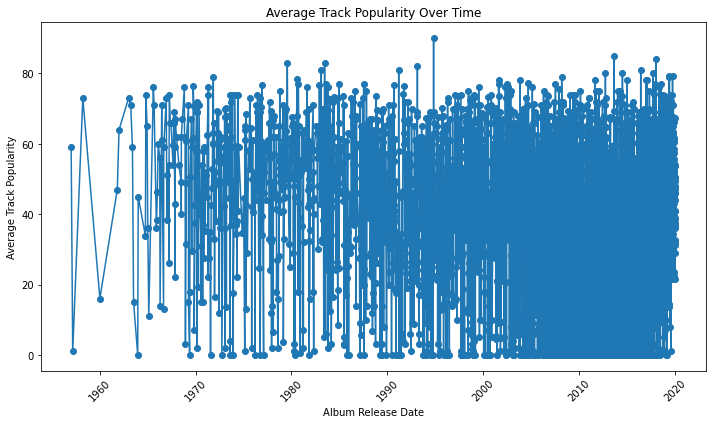

In [18]:
# Plotting the average track popularity over time
plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_by_date.index, avg_popularity_by_date.values, marker='o', linestyle='-')
plt.title('Average Track Popularity Over Time')
plt.xlabel('Album Release Date')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Genre Popularity: Create a bar chart showing the number of tracks per playlist genre to understand which genres are most represented.

In [19]:
# Grouping by playlist genre and counting the number of tracks in each genre
genre_counts = df['playlist_genre'].value_counts()

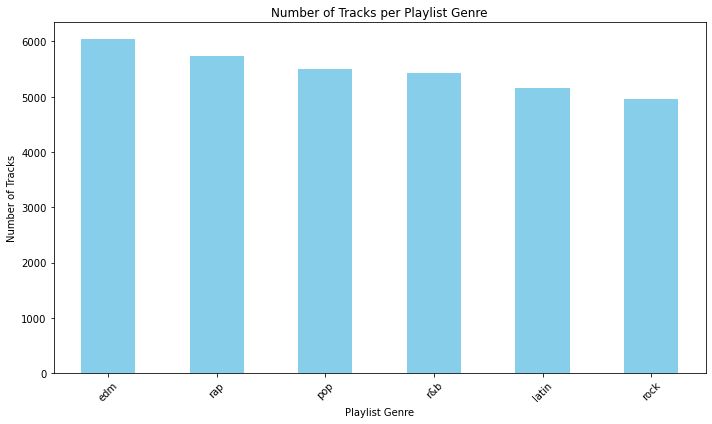

In [20]:
# Plotting the number of tracks per playlist genre as a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks per Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Energy vs. Danceability: Make a scatter plot comparing 'energy' and 'danceability' for tracks, possibly color-coded by genre, to see if there's a correlation between how energetic and danceable tracks are.

In [21]:
# Plotting a scatter plot of 'energy' vs 'danceability', color-coded by 'playlist_genre'
plt.figure(figsize=(10, 6))
genres = df['playlist_genre'].unique()  # Get unique genres for color-coding

<Figure size 720x432 with 0 Axes>

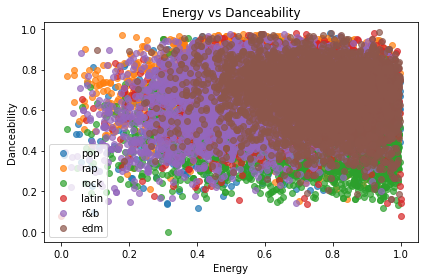

In [23]:
for genre in genres:
    genre_data = df[df['playlist_genre'] == genre]
    plt.scatter(genre_data['energy'], genre_data['danceability'], label=genre, alpha=0.7)
    
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend()
plt.tight_layout()
plt.show()

# Loudness and Popularity: Plot a scatter plot of 'loudness' against 'track_popularity' to investigate if louder tracks tend to be more popular.

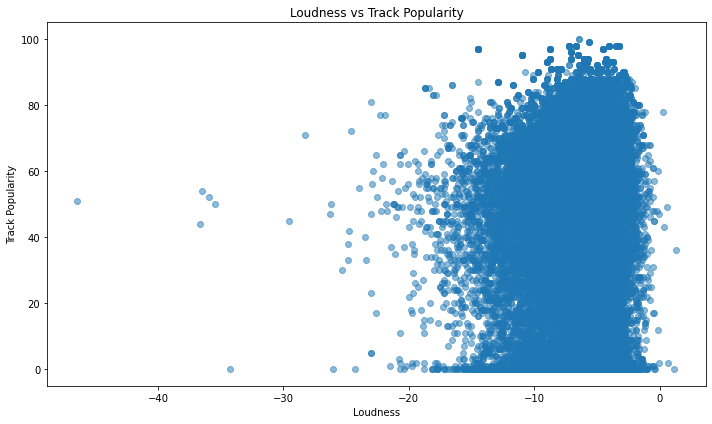

In [24]:
# Plotting a scatter plot of 'loudness' vs 'track_popularity'
plt.figure(figsize=(10, 6))
plt.scatter(df['loudness'], df['track_popularity'], alpha=0.5)
plt.title('Loudness vs Track Popularity')
plt.xlabel('Loudness')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()

# Key Distribution: Use a histogram to show the distribution of musical keys across all tracks to find out if some keys are more common in popular music.

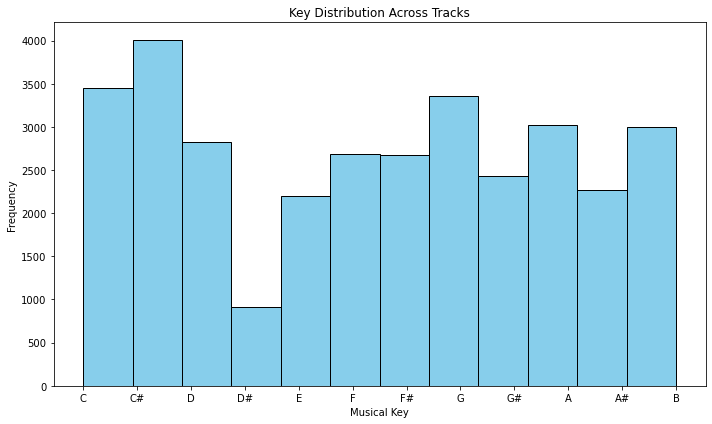

In [25]:
# Plotting a histogram of the distribution of musical keys across all tracks
plt.figure(figsize=(10, 6))
df['key'].plot(kind='hist', bins=12, color='skyblue', edgecolor='black')
plt.title('Key Distribution Across Tracks')
plt.xlabel('Musical Key')
plt.ylabel('Frequency')
plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.tight_layout()
plt.show()

# Duration of Tracks: Create a histogram of track durations to see the common lengths of tracks and identify any outliers.

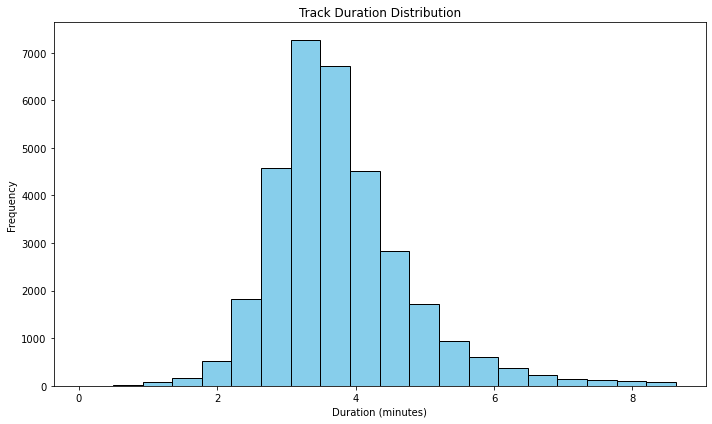

In [26]:
# Plotting a histogram of track durations
plt.figure(figsize=(10, 6))
df['duration_ms'] = df['duration_ms'] / 60000  # Convert duration from ms to minutes for better readability
df['duration_ms'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Track Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 07) Speechiness in Different Genres: Box plots of 'speechiness' for each genre to compare the presence of spoken words in tracks across different genres. 

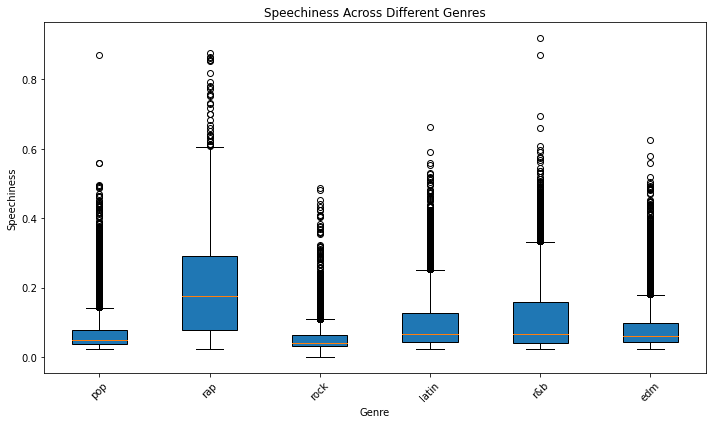

In [27]:
# Creating box plots of 'speechiness' for each genre
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Speechiness Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Speechiness')
plt.boxplot([df[df['playlist_genre'] == genre]['speechiness'] for genre in df['playlist_genre'].unique()],
            labels=df['playlist_genre'].unique(), patch_artist=True)
plt.tight_layout()
plt.show()

# 08) Acousticness Over Time: A line plot showing the change in 'acousticness' over the years to see if music is becoming more or less acoustic.

In [28]:
# Convert 'track_album_release_date' column to datetime if it's not already in datetime format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

In [29]:
# Grouping by album release year and calculating the mean acousticness for each year
avg_acousticness_by_year = df.groupby(df['track_album_release_date'].dt.year)['acousticness'].mean()

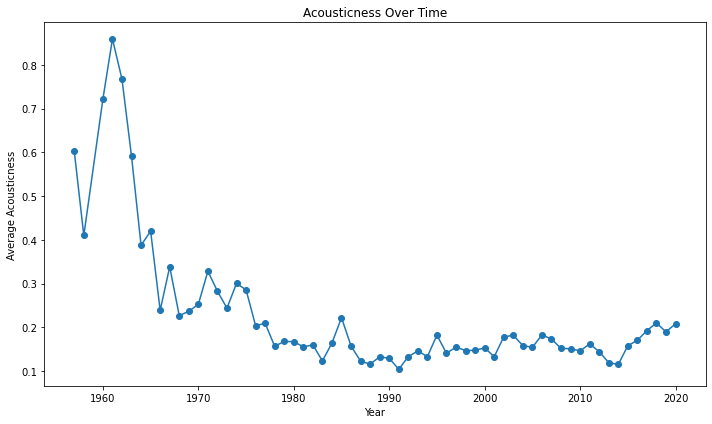

In [30]:
# Plotting the change in 'acousticness' over the years
plt.figure(figsize=(10, 6))
plt.plot(avg_acousticness_by_year.index, avg_acousticness_by_year.values, marker='o', linestyle='-')
plt.title('Acousticness Over Time')
plt.xlabel('Year')
plt.ylabel('Average Acousticness')
plt.tight_layout()
plt.show()

# 09) Valence and Mood: A scatter plot of 'valence' against 'energy' to explore the relationship between the musical positiveness (valence) and the intensity and activity of a song.

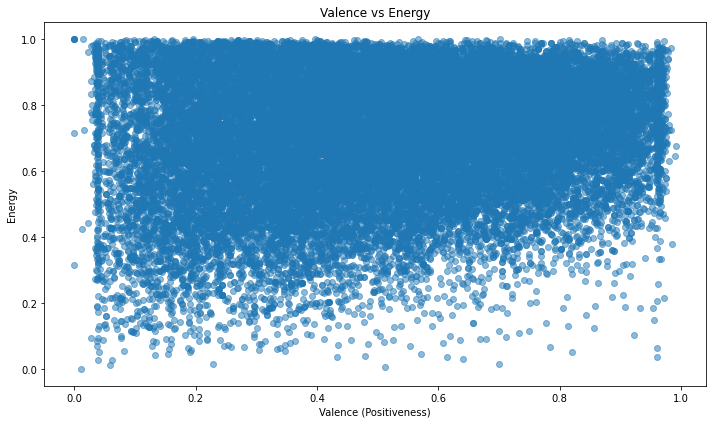

In [31]:
# Plotting a scatter plot of 'valence' against 'energy'
plt.figure(figsize=(10, 6))
plt.scatter(df['valence'], df['energy'], alpha=0.5)
plt.title('Valence vs Energy')
plt.xlabel('Valence (Positiveness)')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()

# 10) Tempo Distribution by Genre: Create a series of histograms or KDE plots for 'tempo' separated by genre to see if certain genres tend to have faster or slower tempos.

In [32]:
import seaborn as sns

C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


No handles with labels found to put in legend.


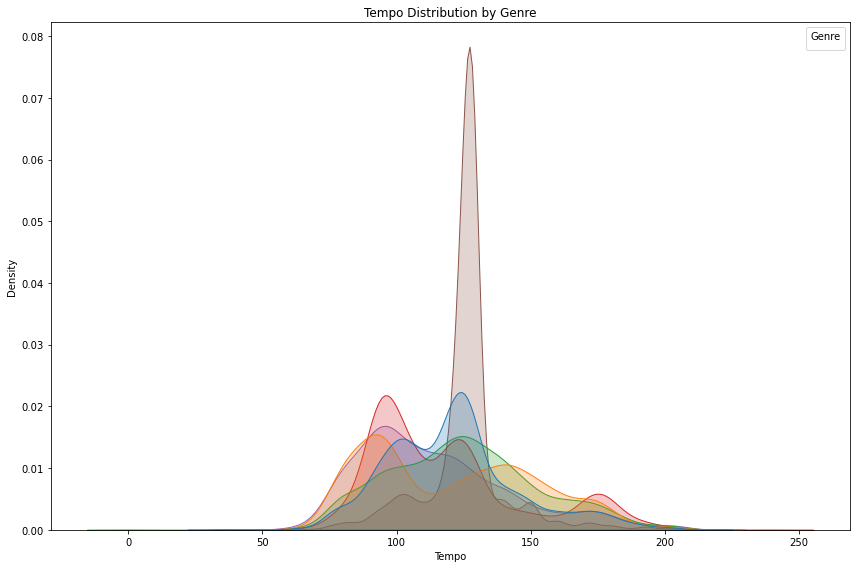

In [33]:
# Creating KDE plots for 'tempo' separated by genre
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='tempo', hue='playlist_genre', fill=True, common_norm=False)
plt.title('Tempo Distribution by Genre')
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()